SumNode_0
[0, 1, 2]
[SumNode_0, ProductNode_1, ProductNode_2, CategoricalNode_3, SumNode_4, ProductNode_5, CategoricalNode_6, ProductNode_7, ProductNode_8, CategoricalNode_9, CategoricalNode_10, CategoricalNode_11, CategoricalNode_12, CategoricalNode_13, CategoricalNode_14]


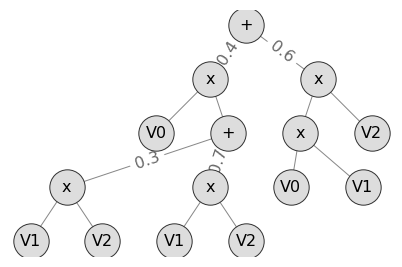

In [3]:
import spn
from spn.structure.leaves.parametric.Parametric import Categorical

from spn.structure.Base import Sum, Product

from spn.structure.Base import assign_ids, rebuild_scopes_bottom_up


p0 = Product(children=[Categorical(p=[0.3, 0.7], scope=1), Categorical(p=[0.4, 0.6], scope=2)])
p1 = Product(children=[Categorical(p=[0.5, 0.5], scope=1), Categorical(p=[0.6, 0.4], scope=2)])
s1 = Sum(weights=[0.3, 0.7], children=[p0, p1])
p2 = Product(children=[Categorical(p=[0.2, 0.8], scope=0), s1])
p3 = Product(children=[Categorical(p=[0.2, 0.8], scope=0), Categorical(p=[0.3, 0.7], scope=1)])
p4 = Product(children=[p3, Categorical(p=[0.4, 0.6], scope=2)])
spn = Sum(weights=[0.4, 0.6], children=[p2, p4])

a = assign_ids(spn)
print(a)
b = rebuild_scopes_bottom_up(spn)
print(b)

from spn.io.Graphics import plot_spn

plot_spn(spn, 'basicspn.png')

[SumNode_0, ProductNode_1, ProductNode_2, ProductNode_3, CategoricalNode_4, CategoricalNode_5, CategoricalNode_6, CategoricalNode_7, CategoricalNode_8, CategoricalNode_9]


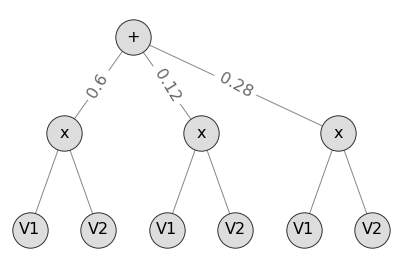

In [6]:
from spn.algorithms.Marginalization import marginalize

spn_marg = marginalize(spn, [1,2])
plot_spn(spn_marg, 'marginalspn.png')

In [7]:
from spn.io.Text import spn_to_str_equation
txt = spn_to_str_equation(spn_marg)
print(txt)

(0.6*((Categorical(V1|p=[0.3, 0.7]) * Categorical(V2|p=[0.4, 0.6]))) + 0.12000000000000002*((Categorical(V1|p=[0.3, 0.7]) * Categorical(V2|p=[0.4, 0.6]))) + 0.27999999999999997*((Categorical(V1|p=[0.5, 0.5]) * Categorical(V2|p=[0.6, 0.4]))))


In [13]:
import numpy as np
test_data = np.array([1.0, 0.0, 1.0]).reshape(1,3)
print(test_data)

[[1. 0. 1.]]


In [14]:
from spn.algorithms.Inference import log_likelihood

ll = log_likelihood(spn, test_data)
print(ll, np.exp(ll))

[[-1.90730501]] [[0.14848]]
